# 1. Download and Load the Training, Test and Validation Datasets

Data source: [BOston Neonatal Brain Injury Data](https://zenodo.org/records/10602767)

In [1]:
!wget https://zenodo.org/records/10602767/files/BONBID2023_Train.zip?download=1 -O train_data.zip
!wget https://zenodo.org/records/10602767/files/BONBID2023_Test.zip?download=1 -O test_data.zip
!wget https://zenodo.org/records/10602767/files/BONBID2023_Val.zip?download=1 -O val_data.zip
!wget https://zenodo.org/records/10602767/files/atlases.tar.gz?download=1 -O atlases.tar.gz

--2026-02-08 09:30:21--  https://zenodo.org/records/10602767/files/BONBID2023_Train.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.114, 188.184.103.118, 137.138.52.235, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56318691 (54M) [application/octet-stream]
Saving to: ‘train_data.zip’

train_data.zip      100%[===================>]  53.71M  15.1MB/s    in 3.6s    

2026-02-08 09:30:25 (15.1 MB/s) - ‘train_data.zip’ saved [56318691/56318691]

--2026-02-08 09:30:25--  https://zenodo.org/records/10602767/files/BONBID2023_Test.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.114, 188.184.103.118, 137.138.52.235, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27300553 (26M) [application/octet-stream]
Saving to: ‘test_data.zip’

test_data.zip       100%[===================>]  26.04M  16.1MB/s    i

In [2]:
!unzip /content/train_data.zip

Archive:  /content/train_data.zip
   creating: BONBID2023_Train/
  inflating: BONBID2023_Train/.DS_Store  
  inflating: __MACOSX/BONBID2023_Train/._.DS_Store  
   creating: BONBID2023_Train/3LABEL/
  inflating: BONBID2023_Train/BONBID2023_clinicaldata_train.xlsx  
  inflating: __MACOSX/BONBID2023_Train/._BONBID2023_clinicaldata_train.xlsx  
   creating: BONBID2023_Train/2Z_ADC/
   creating: BONBID2023_Train/1ADC_ss/
  inflating: BONBID2023_Train/3LABEL/MGHNICU_435-VISIT_01_lesion.mha  
  inflating: BONBID2023_Train/3LABEL/MGHNICU_074-VISIT_01_lesion.mha  
  inflating: BONBID2023_Train/3LABEL/MGHNICU_306-VISIT_01_lesion.mha  
  inflating: BONBID2023_Train/3LABEL/MGHNICU_153-VISIT_01_lesion.mha  
  inflating: BONBID2023_Train/3LABEL/MGHNICU_101-VISIT_01_lesion.mha  
  inflating: BONBID2023_Train/3LABEL/MGHNICU_272-VISIT_01_lesion.mha  
  inflating: BONBID2023_Train/3LABEL/MGHNICU_437-VISIT_01_lesion.mha  
  inflating: BONBID2023_Train/3LABEL/MGHNICU_305-VISIT_01_lesion.mha  
  inflating:

In [7]:
!pip install SimpleITK # A special package to read in and view medical images

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 19.0 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as skl
import SimpleITK as sitk
import tensorflow as tf
from tensorflow import keras


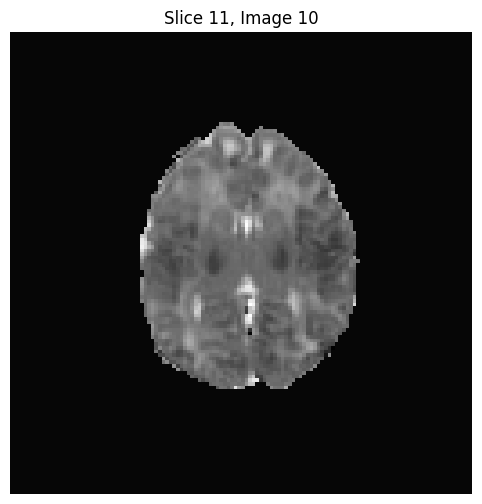

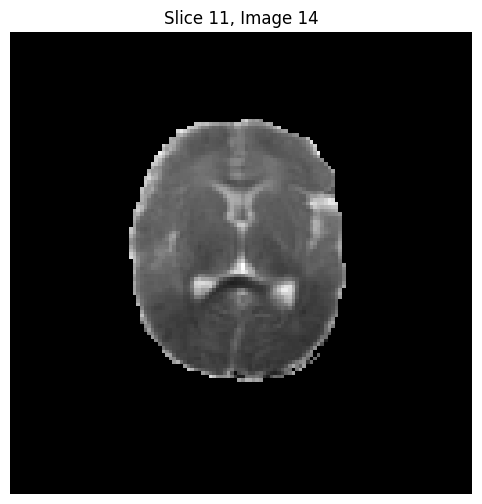

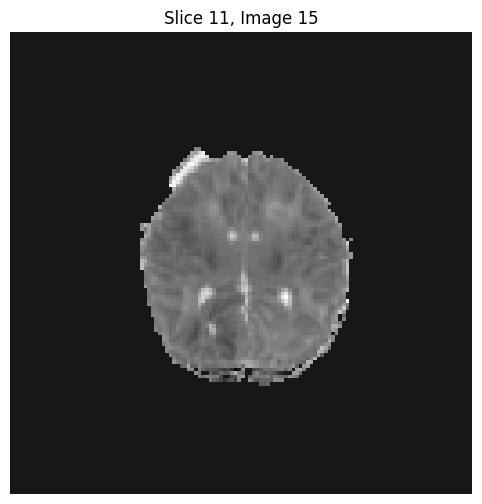

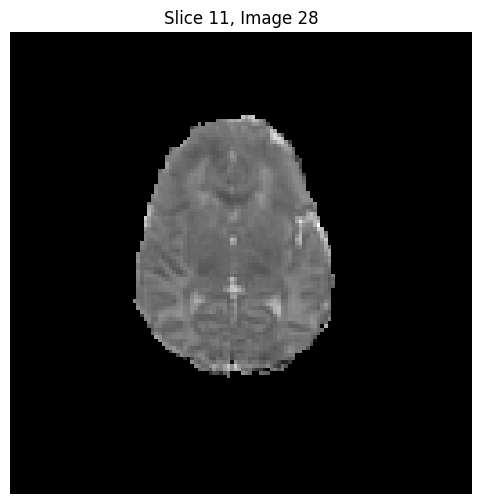

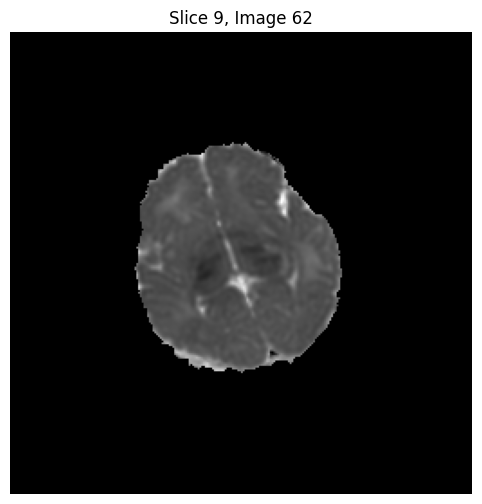

In [17]:
#Some basic EDA; we read in and visualise the first five images to get a glimpse of the data we'll be dealing with.


data_dir = '/content/BONBID2023_Train'

for i in [10, 14, 15, 28, 62]:
  train_image = sitk.ReadImage(f"{data_dir}/1ADC_ss/MGHNICU_0{i}-VISIT_01-ADC_ss.mha")
  train_array = sitk.GetArrayFromImage(train_image)
  mid_slice = train_array.shape[0] // 2

  plt.figure(figsize=(8, 6))
  plt.imshow(train_array[mid_slice, :, :], cmap = 'gray')
  plt.title(f"Slice {mid_slice}, Image {i}")
  plt.axis('off')
  plt.show()